In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.DataFrame({
    'Feature1': [2.5, 3.5, 4.5, 5.5, 6.5, 7.5],
    'Feature2': [8.5, 7.5, 6.5, 5.5, 4.5, 3.5]
})

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
covariance_matrix = np.cov(data_scaled.T)

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [12]:
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]


In [14]:
k = 1
principal_components = eigenvectors_sorted[:, :k]

In [16]:
transformed_data = np.dot(data_scaled, principal_components)

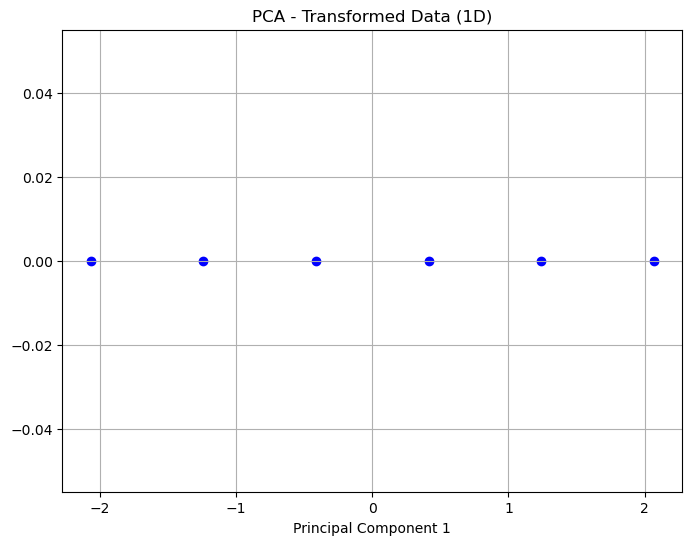

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data, np.zeros_like(transformed_data), color='blue')  # 1D data projected
plt.title('PCA - Transformed Data (1D)')
plt.xlabel('Principal Component 1')
plt.grid(True)
plt.show()

In [20]:
print("Eigenvalues (Variance explained by each principal component):")
print(eigenvalues_sorted)

Eigenvalues (Variance explained by each principal component):
[2.40000000e+00 2.66453526e-16]


In [22]:
print("\nPrincipal Components (Eigenvectors):")
print(eigenvectors_sorted)

print("\nTransformed Data (Reduced Dimensionality):")
print(transformed_data)

# Calculate and print the cumulative variance explained
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nExplained Variance Ratio per component:")
print(explained_variance_ratio)

print("\nCumulative Variance Explained:")
print(cumulative_variance)



Principal Components (Eigenvectors):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Transformed Data (Reduced Dimensionality):
[[-2.07019668]
 [-1.24211801]
 [-0.41403934]
 [ 0.41403934]
 [ 1.24211801]
 [ 2.07019668]]

Explained Variance Ratio per component:
[1.00000000e+00 1.11022302e-16]

Cumulative Variance Explained:
[1. 1.]
